In [1]:
import numpy as np
import pImpactR as impact
from copy import deepcopy as copy
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)
import pandas as P
P.set_option('display.precision',3)

In [2]:
NL_t = -0.4
NL_c = 0.01
NL_L = 1.8
NL_mu = 0.3034496449165134

mass = 938.272045e6
ke = 2.5*1.0e6
energy = ke+mass
freq = 30*1.0e6

g = energy/mass
bg = np.sqrt(g**2-1.0)
vec = bg/g*impact.data.clight

alfaEntrance = np.tan(np.pi*NL_mu)
betaEntrance = NL_L/np.sin(2.0*np.pi*NL_mu)

In [3]:
print(alfaEntrance,betaEntrance)

1.4082261727304293 1.9065054393933862


# Check Kick on y=0 axis

In [4]:
def croot(z):
    return np.sqrt(1.0-z**2)

def carcsin(z):
    return -1j*np.log(1j*z+croot(z))

def Fderivative(x,y):
    zeta = x+1j*y
    denom = croot(zeta)
    return zeta/denom**2 + carcsin(zeta)/denom**3

In [5]:
def carcsin2(z):
    return np.arcsin(z)

def Fderivative2(x,y):
    zeta = x+1j*y
    denom = croot(zeta)
    return zeta/denom**2 + carcsin2(zeta)/denom**3

In [6]:
y=0.0
y=np.array(y)
for x in [0.8,0.9,1.1,1.2]:
    print(x,Fderivative(x,0.0),Fderivative2(x,0.0))

0.8 (6.515255638896358+2.0559685641206615e-16j) (6.515255638896358+0j)
0.9 (18.25751289733131+1.785037238059147e-16j) (18.25751289733131+0j)
1.1 (-0.6288319691627713+16.322660020172773j) (-9.847358507027696+16.322660020172773j)
1.2 (-0.594893689661065+5.381964915337972j) (-4.85965176488439+5.381964915337972j)


In [7]:
y = 0.0
for x in [0.8,0.9,1.1,1.2]:
    z=x+1j*y
    print(x,carcsin(z),carcsin2(z))

0.8 (0.9272952180016124+4.440892098500625e-17j) (0.9272952180016123+0j)
0.9 (1.1197695149986342+1.4783514169197868e-17j) (1.1197695149986342+0j)
1.1 (1.5707963267948966-0.4435682543851154j) (1.5707963267948966+0.4435682543851154j)
1.2 (1.5707963267948966-0.6223625037147785j) (1.5707963267948966+0.6223625037147786j)


In [8]:
y = 0.0
for x in [0.8,0.9,1.1,1.2]:
    z=x+1j*y
    denom = croot(z)
    a=carcsin(z)/denom**3
    b=carcsin2(z)/denom**3
    print(x,a,b)

0.8 (4.293033416674135+2.0559685641206615e-16j) (4.293033416674135+0j)
0.9 (13.520670792068149+1.785037238059147e-16j) (13.520670792068149+0j)
1.1 (4.609263268932462+16.322660020172773j) (-4.609263268932462+16.322660020172773j)
1.2 (2.1323790376116625+5.381964915337972j) (-2.132379037611663+5.381964915337972j)


In [9]:
y=0.0
X = np.linspace(-1,1,3)*1.0e-11 + 1.1
for x in X:
    z = x+1j*y
    print(x,Fderivative(x,0.0),Fderivative2(x,0.0))  

1.09999999999 (-0.6288319691663498+16.322660022737757j) (-9.847358508026382+16.322660022737757j)
1.1 (-0.6288319691627713+16.322660020172773j) (-9.847358507027696+16.322660020172773j)
1.10000000001 (-0.6288319691591928+16.32266001760779j) (-9.84735850602901+16.32266001760779j)


In [10]:
Y = np.linspace(-1,1,3)*1.0e-11
for y in Y:
    print(y,Fderivative(1.1,y),Fderivative2(1.1,y))  

-1e-11 (-0.6288319717277604+16.322660020169195j) (-0.6288319717277604+16.322660020169195j)
0.0 (-0.6288319691627713+16.322660020172773j) (-9.847358507027696+16.322660020172773j)
1e-11 (-0.6288319717277613-16.322660020169195j) (-0.6288319717277604-16.322660020169195j)


In [11]:
Y = np.linspace(-1,1,3)*1.0e-11
x=1.1
for y in Y:
    z = x+1j*y
    print(y,carcsin(z),carcsin2(z))  

-1e-11 (1.570796326773075-0.4435682543851154j) (1.570796326773075-0.4435682543851154j)
0.0 (1.5707963267948966-0.4435682543851154j) (1.5707963267948966+0.4435682543851154j)
1e-11 (1.570796326773075+0.4435682543851153j) (1.570796326773075+0.4435682543851154j)


# Check Potential on y=0 axis

In [12]:
def Fpotential(x,y):
    zeta = x+1j*y
    return zeta/croot(zeta)*carcsin(zeta)

def Fpotential2(x,y):
    zeta = x+1j*y
    return zeta/croot(zeta)*carcsin2(zeta)

In [13]:
y=0.0
for x in [0.8,0.9,1.1,1.2]:
    z = x+1j*y
    print(x,np.real(Fpotential(x,0.0)),np.real(Fpotential2(x,0.0)))
print()    
y=1.0e-12
for x in [0.8,0.9,1.1,1.2]:
    z = x+1j*y
    print(x,np.real(Fpotential(x,0.0)),np.real(Fpotential2(x,0.0)))
print()
y=-1.0e-12
for x in [0.8,0.9,1.1,1.2]:
    z = x+1j*y
    print(x,np.real(Fpotential(x,0.0)),np.real(Fpotential2(x,0.0)))

0.8 1.2363936240021502 1.23639362400215
0.9 2.312034705443653 2.312034705443653
1.1 -1.0647398151234 1.0647398151234
1.2 -1.1258961318589578 1.125896131858958

0.8 1.2363936240021502 1.23639362400215
0.9 2.312034705443653 2.312034705443653
1.1 -1.0647398151234 1.0647398151234
1.2 -1.1258961318589578 1.125896131858958

0.8 1.2363936240021502 1.23639362400215
0.9 2.312034705443653 2.312034705443653
1.1 -1.0647398151234 1.0647398151234
1.2 -1.1258961318589578 1.125896131858958


In [14]:
y=0.0
X = np.linspace(-1,1,3)*1.0e-11 + 1.1
for x in X:
    z = x+1j*y
    print(x,np.real(Fpotential(x,0.0)),np.real(Fpotential2(x,0.0)))  

1.09999999999 -1.0647398151171117 1.0647398151171117
1.1 -1.0647398151234 1.0647398151234
1.10000000001 -1.0647398151296885 1.0647398151296885


In [15]:
Y = np.linspace(-1,1,3)*1.0e-9
for y in Y:
    print(y,np.real(Fpotential(1.1,y)),np.real(Fpotential2(1.1,y)))  

-1e-09 -1.06473979880074 -1.06473979880074
0.0 -1.0647398151234 1.0647398151234
1e-09 -1.0647397988007399 -1.06473979880074


In [16]:
print(-1.0647397988007399 - -1.0647398151234)

1.6322660112422227e-08


In [17]:
print(-1.0647398151234 - -1.06473979880074)

-1.6322659890377622e-08


# def subroutine 

In [18]:
def croot(z):
    return np.sqrt(1.0-z**2)

def carcsin(z):
    return -1j*np.log(1j*z+croot(z))

def Fpotential(x,y):
    zeta = x+1j*y
    return zeta/croot(zeta)*carcsin(zeta)

def Fderivative(x,y):
    zeta = x+1j*y
    denom = croot(zeta)
    return zeta/denom**2 + carcsin(zeta)/denom**3

def driftpropagator(x,px,y,py,ds):
    x= x+px*ds
    y= y+py*ds
    return x,px,y,py

def NLpropagator(x,px,y,py,ds):
    dF = Fderivative(x,y)
    px = px - x*ds + np.real(dF)*ds*NL_t
    if y==0.0:
        py = py - y*ds
    else:
        py = py - y*ds - np.imag(dF)*ds*NL_t
    return x,px,y,py


def InvariantPotentials(x,px,y,py):
    zeta = x+1j*y
    zetaconj = x-1j*y
    Hpotential = zeta/croot(zeta)
    Ipotential = (zeta+zetaconj)/croot(zeta)   
    Hpotential = Hpotential*carcsin(zeta)
    Ipotential = Ipotential*carcsin(zeta)
    Hinv = -NL_t*np.real(Hpotential) + 0.5*(x**2+px**2+y**2+py**2)
    Iinv = -NL_t*np.real(Ipotential) + (x*py - y*px)**2 + x**2 + px**2
    return Hinv,Iinv
    
def track(x,px,y,py,L,n):
    ds = L/n
    data = np.zeros((6,n+1))
    for i in range(n):
        data[:4,i] = x,px,y,py
        data[4:,i] = InvariantPotentials(x,px,y,py)
        x,px,y,py = driftpropagator(x,px,y,py,0.5*ds)
        x,px,y,py = NLpropagator(x,px,y,py,ds)
        x,px,y,py = driftpropagator(x,px,y,py,0.5*ds)
    data[:4,-1] = x,px,y,py
    data[4:,-1] = InvariantPotentials(x,px,y,py)
    return data

In [19]:
x = 1.159;
y = 0.307;
px= 0.0;
py= 0.0;
Lrad = 30.0
data1 = track(x,px,y,py,Lrad,1000)
data2 = track(x-1.0e-3,px,y,py,Lrad,1000)
data3 = track(x-1.0e-3,px,y+1.0e-3,py,Lrad,1000)
data4 = track(x,px,y-1.0e-3,py,Lrad,1000)
data5 = track(x+1.0e-3,px,y,py,Lrad,1000)

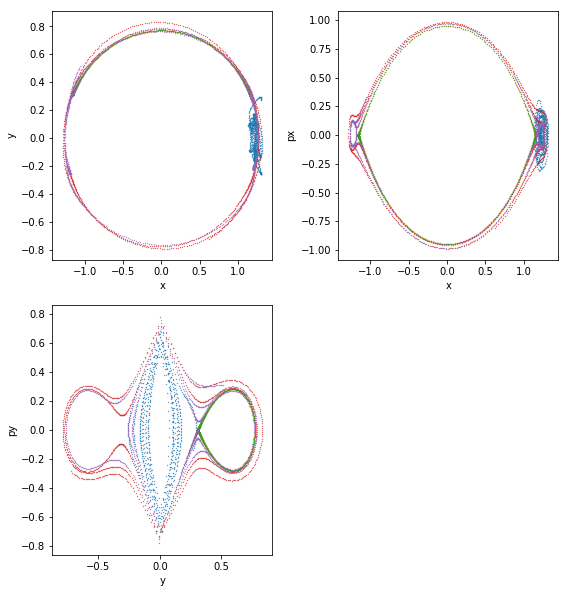

In [20]:
plt.figure(figsize=(8,12))
plt.subplot(3,2,1)
plt.scatter(data1[0,:],data1[2,:],s=0.1)
plt.scatter(data2[0,:],data2[2,:],s=0.1)
plt.scatter(data3[0,:],data3[2,:],s=0.1)
plt.scatter(data4[0,:],data4[2,:],s=0.1)
plt.scatter(data5[0,:],data5[2,:],s=0.1)
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(3,2,2)
plt.scatter(data1[0,:],data1[1,:],s=0.1)
plt.scatter(data2[0,:],data2[1,:],s=0.1)
plt.scatter(data3[0,:],data3[1,:],s=0.1)
plt.scatter(data4[0,:],data4[1,:],s=0.1)
plt.scatter(data5[0,:],data5[1,:],s=0.1)
plt.xlabel('x')
plt.ylabel('px')
plt.subplot(3,2,3)
plt.scatter(data1[2,:],data1[3,:],s=0.1)
plt.scatter(data2[2,:],data2[3,:],s=0.1)
plt.scatter(data3[2,:],data3[3,:],s=0.1)
plt.scatter(data4[2,:],data4[3,:],s=0.1)
plt.scatter(data5[2,:],data5[3,:],s=0.1)
plt.xlabel('y')
plt.ylabel('py')
# plt.subplot(3,2,4)
# plt.plot(X,data1[3,:])
# plt.plot(X,data2[3,:])
# plt.plot(X,data3[3,:])
# plt.plot(X,data4[3,:])
# plt.plot(X,data5[3,:])
# plt.ylabel('py')
# plt.subplot(3,2,5)
# plt.plot(X,data1[4,:])
# plt.plot(X,data2[4,:])
# plt.plot(X,data3[4,:])
# plt.plot(X,data4[4,:])
# plt.plot(X,data5[4,:])
# plt.ylabel('Hiv')
# plt.subplot(3,2,6)
# plt.plot(X,data1[5,:])
# plt.plot(X,data2[5,:])
# plt.plot(X,data3[5,:])
# plt.plot(X,data4[5,:])
# plt.plot(X,data5[5,:])
# plt.ylabel('Iinv')
plt.tight_layout()

(0.3, 0.315)

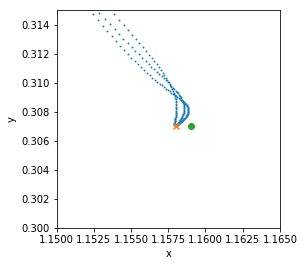

In [21]:
plt.figure(figsize=(4,4))
plt.scatter(data2[0,:],data2[2,:],s=0.8)
plt.scatter(data2[0,0],data2[2,0],marker='x')
plt.scatter(data1[0,0],data1[2,0],marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(1.15,1.165)
plt.ylim(0.30,0.315)

Text(0,0.5,'y')

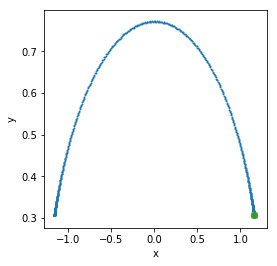

In [22]:
plt.figure(figsize=(4,4))
plt.scatter(data2[0,:],data2[2,:],s=0.8)
plt.scatter(data2[0,0],data2[2,0],marker='x')
plt.scatter(data1[0,0],data1[2,0],marker='o')
plt.xlabel('x')
plt.ylabel('y')

Text(0,0.5,'y')

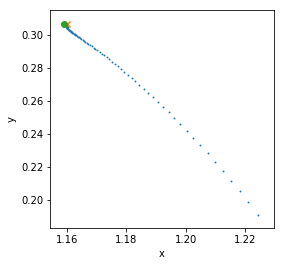

In [23]:
plt.figure(figsize=(4,4))
plt.scatter(data5[0,:100],data5[2,:100],s=0.8)
plt.scatter(data5[0,0],data5[2,0],marker='x')
plt.scatter(data1[0,0],data1[2,0],marker='o')
plt.xlabel('x')
plt.ylabel('y')

(-1.0, 1.0)

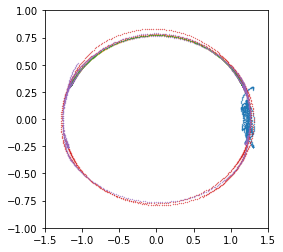

In [24]:
plt.figure(figsize=(4,4))
plt.scatter(data1[0,:],data1[2,:],s=0.1)
plt.scatter(data2[0,:],data2[2,:],s=0.1)
plt.scatter(data3[0,:],data3[2,:],s=0.1)
plt.scatter(data4[0,:],data4[2,:],s=0.1)
plt.scatter(data5[0,:],data5[2,:],s=0.1)
plt.xlim(-1.5,1.5)
plt.ylim(-1.0,1.0)

In [25]:
def croot(z):
    return np.sqrt(1.0-z**2)

def carcsin(z):
    return -1j*np.log(1j*z+croot(z))

def Fpotential(x,y):
    zeta = x+1j*y
    return zeta/croot(zeta)*carcsin(zeta)

def Fderivative(x,y):
    zeta = x+1j*y
    denom = croot(zeta)
#     print(carcsin(zeta))
#     print(zeta/denom**2, carcsin(zeta)/denom**3)
    return zeta/denom**2 + carcsin(zeta)/denom**3

def driftpropagator(x,px,y,py,ds):
    x= x+px*ds
    y= y+py*ds
    return x,px,y,py

def NLpropagator(x,px,y,py,ds):
    dF = Fderivative(x,y)
    px = px - x*ds + np.real(dF)*ds*NL_t
    py = py - y*ds - np.imag(dF)*ds*NL_t
    return x,px,y,py


def InvariantPotentials(x,px,y,py):
    zeta = x+1j*y
    zetaconj = x-1j*y
    Hpotential = zeta/croot(zeta)
    Ipotential = (zeta+zetaconj)/croot(zeta)   
    Hpotential = Hpotential*carcsin(zeta)
    Ipotential = Ipotential*carcsin(zeta)
    Hinv = -NL_t*np.real(Hpotential) + 0.5*(x**2+px**2+y**2+py**2)
    Iinv = -NL_t*np.real(Ipotential) + (x*py - y*px)**2 + x**2 + px**2
    return Hinv,Iinv
    
def track(x,px,y,py,L,n):
    ds = L/n
    data = np.zeros((6,n+1))
    for i in range(n):
        data[:4,i] = x,px,y,py
        data[4:,i] = InvariantPotentials(x,px,y,py)
        x,px,y,py = driftpropagator(x,px,y,py,0.5*ds)
        x,px,y,py = NLpropagator(x,px,y,py,ds)
        x,px,y,py = driftpropagator(x,px,y,py,0.5*ds)
    data[:4,-1] = x,px,y,py
    data[4:,-1] = InvariantPotentials(x,px,y,py)
    return data

In [38]:
#dt = np.dtype('Float128')
dt = np.dtype('Float64')
# x = np.array(0.290755, dtype=dt);
# y = np.array(0.0     , dtype=dt);
# px= np.array(0.40019 , dtype=dt);
# py= np.array(0.0     , dtype=dt);
x = 0.5 ;
y = 0.0 ;
px= 0.0 ;
py= 0.0 ;
Lrad = 2000
step_rad = int(np.round(1000/(0.3*2.0*np.pi)))
data = track(x,px,y,py,Lrad,Lrad*step_rad)

/home/kileanhwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  


/home/kileanhwang/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2198: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


[0.246 0.492]


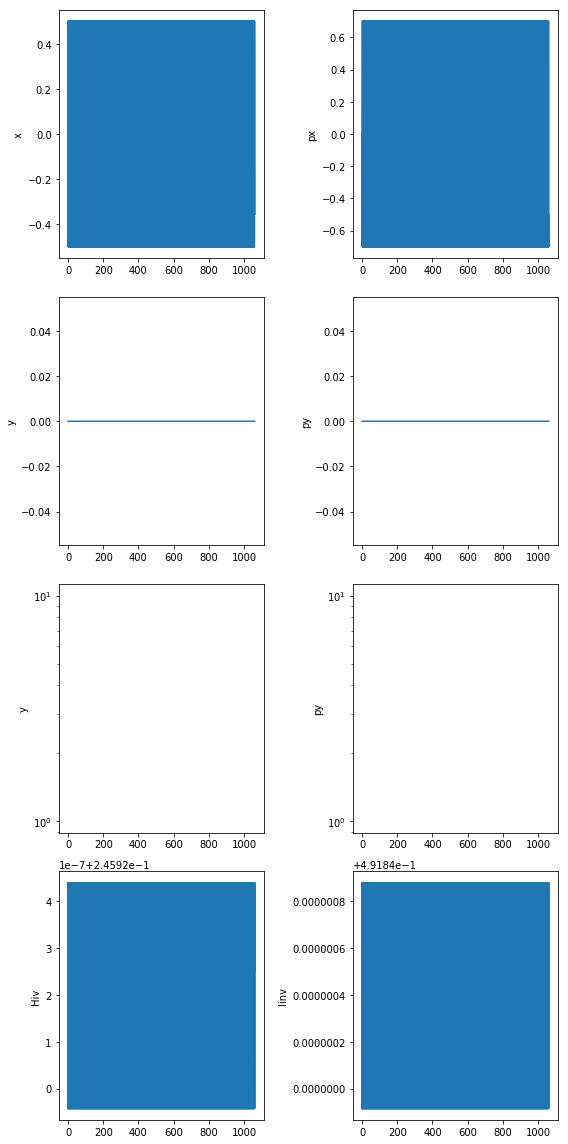

In [39]:
X = np.linspace(0,Lrad/1.885,Lrad*step_rad+1)
plt.figure(figsize=(8,16))
plt.subplot(4,2,1)
plt.plot(X,data[0,:])
plt.ylabel('x')
plt.subplot(4,2,2)
plt.plot(X,data[1,:])
plt.ylabel('px')
plt.subplot(4,2,3)
plt.plot(X,data[2,:])
plt.ylabel('y')
plt.subplot(4,2,4)
plt.plot(X,data[3,:])
plt.ylabel('py')
plt.subplot(4,2,5)
plt.semilogy(X,data[2,:])
plt.ylabel('y')
plt.subplot(4,2,6)
plt.semilogy(X,data[3,:])
plt.ylabel('py')
plt.subplot(4,2,7)
plt.plot(X,data[4,:])
plt.ylabel('Hiv')
plt.subplot(4,2,8)
plt.plot(X,data[5,:])
plt.ylabel('Iinv')
plt.tight_layout()
print(data[[4,5],0])

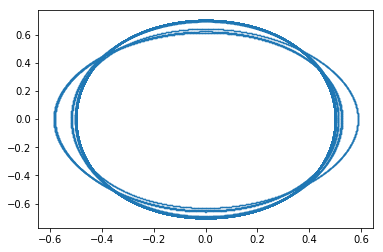

In [33]:
plt.scatter(data[0,:],data[1,:],s=0.1)

In [ ]:
#dt = np.dtype('Float128')
dt = np.dtype('Float64')
# x = np.array(0.290755, dtype=dt);
# y = np.array(0.0     , dtype=dt);
# px= np.array(0.40019 , dtype=dt);
# py= np.array(0.0     , dtype=dt);
x = 0.290755;
y = 0.0     ;
px= 0.40019 ;
py= 0.0     ;
Lrad = 3770
step_rad = int(np.round(1000/(0.3*2.0*np.pi)))
data = track(x,px,y,py,Lrad,Lrad*step_rad)
print(step_rad)

In [ ]:
X = np.linspace(0,Lrad/1.885,Lrad*step_rad+1)
plt.figure(figsize=(8,16))
plt.subplot(4,2,1)
plt.plot(X,data[0,:])
plt.ylabel('x')
plt.subplot(4,2,2)
plt.plot(X,data[1,:])
plt.ylabel('px')
plt.subplot(4,2,3)
plt.plot(X,data[2,:])
plt.ylabel('y')
plt.subplot(4,2,4)
plt.plot(X,data[3,:])
plt.ylabel('py')
plt.subplot(4,2,5)
plt.semilogy(X,data[2,:])
plt.ylabel('y')
plt.subplot(4,2,6)
plt.semilogy(X,data[3,:])
plt.ylabel('py')
plt.subplot(4,2,7)
plt.plot(X,data[4,:])
plt.ylabel('Hiv')
plt.subplot(4,2,8)
plt.plot(X,data[5,:])
plt.ylabel('Iinv')
plt.tight_layout()

In [ ]:
#dt = np.dtype('Float128')
dt = np.dtype('Float64')
# x = np.array(0.290755, dtype=dt);
# y = np.array(0.0     , dtype=dt);
# px= np.array(0.40019 , dtype=dt);
# py= np.array(0.0     , dtype=dt);
x = 0.290755;
y = 0.0     ;
px= 0.40019 ;
py= 0.0     ;
Lrad = 3770
step_rad = int(np.round(1000*(0.3*2.0*np.pi)/1.8))
data = track(x,px,y,py,Lrad,Lrad*step_rad)
print(step_rad)

In [ ]:
X = np.linspace(0,Lrad/1.885,Lrad*step_rad+1)
plt.figure(figsize=(8,16))
plt.subplot(4,2,1)
plt.plot(X,data[0,:])
plt.ylabel('x')
plt.subplot(4,2,2)
plt.plot(X,data[1,:])
plt.ylabel('px')
plt.subplot(4,2,3)
plt.plot(X,data[2,:])
plt.ylabel('y')
plt.subplot(4,2,4)
plt.plot(X,data[3,:])
plt.ylabel('py')
plt.subplot(4,2,5)
plt.semilogy(X,data[2,:])
plt.ylabel('y')
plt.subplot(4,2,6)
plt.semilogy(X,data[3,:])
plt.ylabel('py')
plt.subplot(4,2,7)
plt.plot(X,data[4,:])
plt.ylabel('Hiv')
plt.subplot(4,2,8)
plt.plot(X,data[5,:])
plt.ylabel('Iinv')
plt.tight_layout()

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.scatter(data[0,:],data[2,:],s=0.1)
plt.xlabel('x');
plt.ylabel('y');
plt.subplot(2,2,2)
plt.scatter(data[1,:],data[3,:],s=0.1)
plt.xlabel('px');
plt.ylabel('py');
plt.subplot(2,2,3)
plt.scatter(data[0,:],data[1,:],s=0.1)
plt.xlabel('x');
plt.ylabel('px');
plt.subplot(2,2,4)
plt.scatter(data[2,:],data[3,:],s=0.1)
plt.xlabel('y');
plt.ylabel('py');
plt.tight_layout()

In [ ]:
#dt = np.dtype('Float128')
dt = np.dtype('Float64')
# x = np.array(0.290755, dtype=dt);
# y = np.array(0.0     , dtype=dt);
# px= np.array(0.40019 , dtype=dt);
# py= np.array(0.0     , dtype=dt);
x = 0.290755;
y = 0.0     ;
px= 0.40019 ;
py= 0.0     ;
Lrad = 3000
step_rad = 25
data = track(x,px,y,py,Lrad,Lrad*step_rad)
print(step_rad)

In [ ]:
X = np.linspace(0,Lrad/1.885,Lrad*step_rad+1)
plt.figure(figsize=(8,16))
plt.subplot(4,2,1)
plt.plot(X,data[0,:])
plt.ylabel('x')
plt.subplot(4,2,2)
plt.plot(X,data[1,:])
plt.ylabel('px')
plt.subplot(4,2,3)
plt.plot(X,data[2,:])
plt.ylabel('y')
plt.subplot(4,2,4)
plt.plot(X,data[3,:])
plt.ylabel('py')
plt.subplot(4,2,5)
plt.semilogy(X,data[2,:])
plt.ylabel('y')
plt.subplot(4,2,6)
plt.semilogy(X,data[3,:])
plt.ylabel('py')
plt.subplot(4,2,7)
plt.plot(X,data[4,:])
plt.ylabel('Hiv')
plt.subplot(4,2,8)
plt.plot(X,data[5,:])
plt.ylabel('Iinv')
plt.tight_layout()

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.scatter(data[0,:],data[2,:],s=0.1)
plt.xlabel('x');
plt.ylabel('y');
plt.subplot(2,2,2)
plt.scatter(data[1,:],data[3,:],s=0.1)
plt.xlabel('px');
plt.ylabel('py');
plt.subplot(2,2,3)
plt.scatter(data[0,:],data[1,:],s=0.1)
plt.xlabel('x');
plt.ylabel('px');
plt.subplot(2,2,4)
plt.scatter(data[2,:],data[3,:],s=0.1)
plt.xlabel('y');
plt.ylabel('py');
plt.tight_layout()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[0,:],data[2,:],data[3,:],s=0.4,c=data[0,:],marker='o')
ax.set_xlabel('x');
ax.set_ylabel('y');
ax.set_zlabel('py');

In [ ]:
dt = np.dtype('Float128')
x = np.array(0.290755, dtype=dt);
y = np.array(0.0     , dtype=dt);
px= np.array(0.40019 , dtype=dt);
py= np.array(0.0     , dtype=dt);
# x = 0.290755;
# y = 0.0     ;
# px= 0.40019 ;
# py= 0.0     ;
Lrad = 3770
step_rad = int(np.round(1000*(0.3*2.0*np.pi)/1.8))
data = track(x,px,y,py,Lrad,Lrad*step_rad)
print(step_rad)

In [ ]:
X = np.linspace(0,Lrad/1.885,Lrad*step_rad+1)
plt.figure(figsize=(8,16))
plt.subplot(4,2,1)
plt.plot(X,data[0,:])
plt.ylabel('x')
plt.subplot(4,2,2)
plt.plot(X,data[1,:])
plt.ylabel('px')
plt.subplot(4,2,3)
plt.plot(X,data[2,:])
plt.ylabel('y')
plt.subplot(4,2,4)
plt.plot(X,data[3,:])
plt.ylabel('py')
plt.subplot(4,2,5)
plt.semilogy(X,data[2,:])
plt.ylabel('y')
plt.subplot(4,2,6)
plt.semilogy(X,data[3,:])
plt.ylabel('py')
plt.subplot(4,2,7)
plt.plot(X,data[4,:])
plt.ylabel('Hiv')
plt.subplot(4,2,8)
plt.plot(X,data[5,:])
plt.ylabel('Iinv')
plt.tight_layout()

In [ ]:
dt = np.dtype('Float64')
x = np.array(0.4, dtype=dt);
y = np.array(0.0, dtype=dt);
print(Fderivative(0.4,0.0))

dt = np.dtype('Float128')
x = np.array(0.4, dtype=dt);
y = np.array(0.0, dtype=dt);
print(Fderivative(x,y))

In [ ]:
def croot(z):
    return np.sqrt(1.0-z**2)

def carcsin(z):
    return np.arcsin(z)

def Fpotential(x,y):
    zeta = x+1j*y
    return zeta/croot(zeta)*carcsin(zeta)

def Fderivative(x,y):
    zeta = x+1j*y
    denom = croot(zeta)
    print(carcsin(zeta))
    print(zeta/denom**2, carcsin(zeta)/denom**3)
    return zeta/denom**2 + carcsin(zeta)/denom**3

In [ ]:
dt = np.dtype('Float64')
x = np.array(0.4, dtype=dt);
y = np.array(0.0, dtype=dt);
print(Fderivative(0.4,0.0))

dt = np.dtype('Float128')
x = np.array(0.4, dtype=dt);
y = np.array(0.0, dtype=dt);
print(Fderivative(x,y))